In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Layout

# Update the plot dynamically
def update_plot(line_index):
    # Ensure the line index in valid range
    if line_index < 0 or line_index >= len(data):
        print("Invalid line index")
        return

    line = data[line_index]
    line_data = list(map(int, line.strip().split()))

    # Ensure each line has exactly six integers
    if len(line_data) != 6:
        print(f"Skipping line {line_index + 1} due to invalid data format")
        return

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.bar(np.arange(6), line_data)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Values')
    ax.set_title(f'Chart for Day {line_index + 1}')
    ax.set_xticks(np.arange(6))
    ax.set_xticklabels(['Susceptible', 'Infected', 'Recovered', 'Vaccinated', 'Died', 'Mutation'])
    ax.set_ylim(0, 100000)
    
    plt.show()

# File path to .m file
file_path = 'F:\\Diseases\\result_and_viewer\\result.m'

# Read the data from the .m file
with open(file_path, 'r') as file:
    data = file.readlines()

# Create interactive slider to select days
line_slider = IntSlider(min=0, max=len(data) - 1,layout=Layout(width='70%'), step=1, value=0, description='Day')

# Link the interactive widget to the update plot function
interact(update_plot, line_index=line_slider)


interactive(children=(IntSlider(value=0, description='Day', layout=Layout(width='70%'), max=209), Output()), _…

<function __main__.update_plot(line_index)>

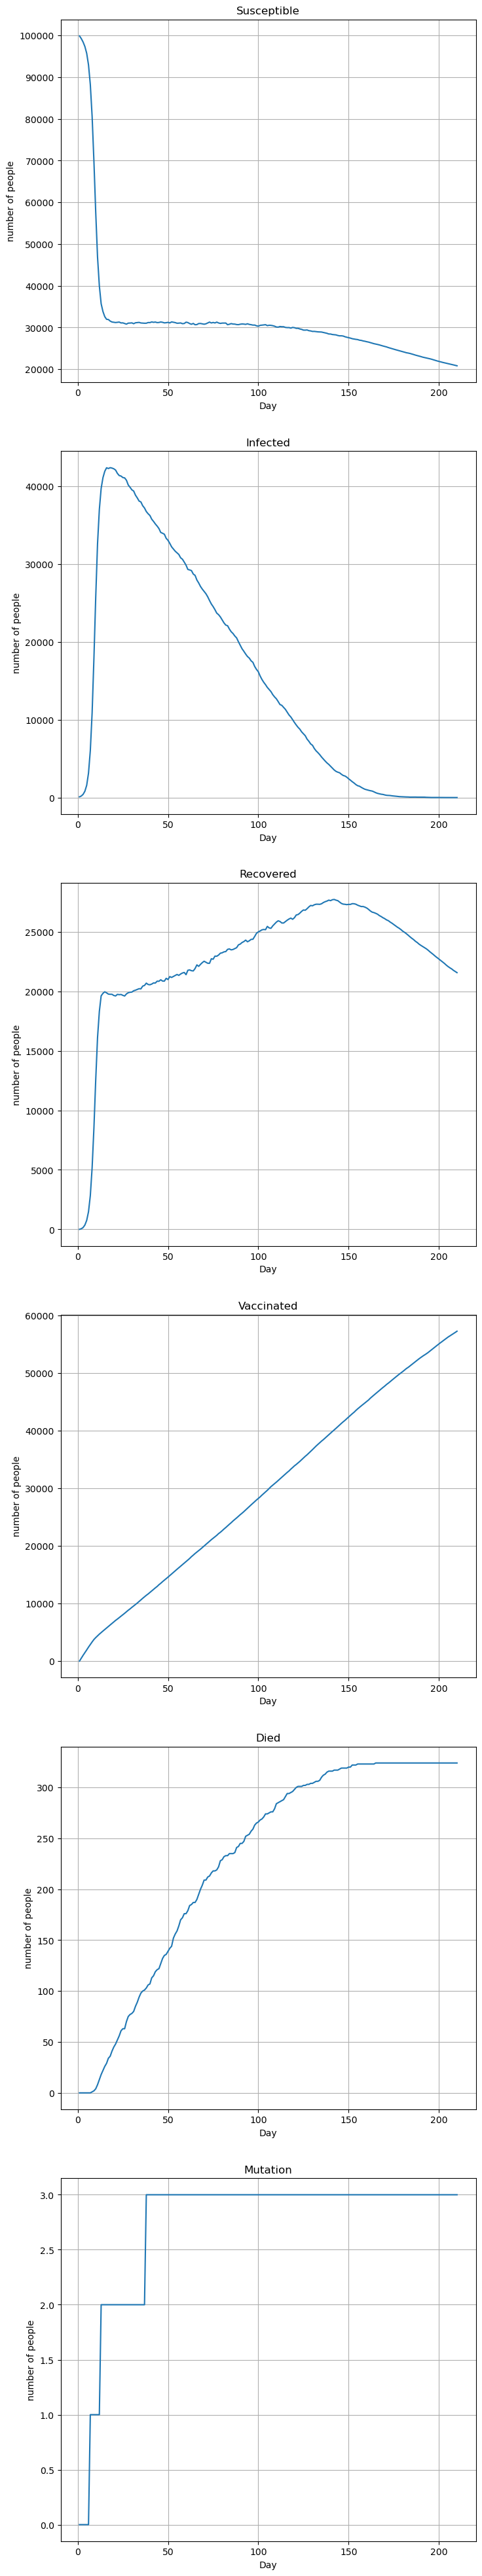

In [6]:
titles = ['Susceptible', 'Infected', 'Recovered', 'Vaccinated', 'Died', 'Mutation']
columns = [[] for _ in range(6)] 

for line in data:
    values = line.strip().split()  
    if len(values) == 6: 
        for i in range(6):
            columns[i].append(float(values[i])) 

x_values = list(range(1, len(columns[0]) + 1))

# Plot each column
fig, axs = plt.subplots(6, 1, figsize=(8, 40))

for i in range(6):
    axs[i].plot(x_values, columns[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Day')
    axs[i].set_ylabel('number of people')
    axs[i].grid(True)

# tight layout
plt.tight_layout(pad=3.0)
plt.show()
